# BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import glob
import os

# CARREGAMENTO

## CARREGAMENTO, LIMPEZA E TRATAMENTO DOS ARQUIVOS INDIVIDUALMENTE

### 1 - arquivo_csv_1:

In [11]:
arquivo_csv_1 = ('uploads/processos_1.csv')
df_1 = pd.read_csv(arquivo_csv_1, sep='#', encoding='utf-8')
print(df_1.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_1['data_distribuicao'] = pd.to_datetime(df_1['data_distribuicao'], errors='coerce')
df_1['data_baixa'] = pd.to_datetime(df_1['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_1['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_1['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_1['ano_distribuicao'] = df_1['data_distribuicao'].dt.year
df_1['ano_baixa'] = df_1['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2020 (ou é NaN)
#    - ano_baixa <= 2020 (ou é NaN)
df_limpo1 = df_1[
    (
        (df_1['ano_distribuicao'] <= 2020)
    ) & 
    (
        (df_1['ano_baixa'] == 2020) | 
        (df_1['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo1.shape}")
print(f"Registros removidos: {len(df_1) - len(df_limpo1)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo1['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo1['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_1) > len(df_limpo1):
    df_removidos = df_1[~df_1.index.isin(df_limpo1.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2020
    ANO = 2020
    dist_maior_ANO = df_1[df_1['ano_distribuicao'] > ANO]
    dist_nula = df_1[df_1['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_1[df_1['ano_baixa'] > ANO]
    baixa_menor_ANO = df_1[df_1['ano_baixa'] < ANO]

    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    print(f"- data_baixa < {ANO}: {len(baixa_menor_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_1[(df_1['ano_distribuicao'] > ANO) & (df_1['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo1)}")
print(f"Total de colunas: {len(df_limpo1.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo1.head())
print(f"\nTipos de dados:")
print(df_limpo1.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo1['data_distribuicao'].isna().sum()} nulos ({df_limpo1['data_distribuicao'].isna().sum()/len(df_limpo1)*100:.1f}%)")
print(f"- data_baixa: {df_limpo1['data_baixa'].isna().sum()} nulos ({df_limpo1['data_baixa'].isna().sum()/len(df_limpo1)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_12476\4203377144.py:2: DtypeWarning: Columns (19,20,22,23,24,25,41,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(arquivo_csv_1, sep='#', encoding='utf-8')


(1318140, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 552132 valores NaT

Shape após limpeza: (1318130, 66)
Registros removidos: 10

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1858), np.int64(1879), np.int64(1919), np.int64(1920), np.int64(1921), np.int64(1928), np.int64(1931), np.int64(1941), np.int64(1944), np.int64(1946), np.int64(1947), np.int64(1948), np.int64(1950), np.int64(1952), np.int64(1953), np.int64(1958), np.int64(1960), np.int64(1961), np.int64(1963), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64

In [14]:
# Gerar o arquivo processos_1.csv limpo
output_filename_csv_1 = 'dataclean/processos_1.csv'
os.makedirs(os.path.dirname(output_filename_csv_1), exist_ok=True)
df_limpo1.to_csv(output_filename_csv_1, index=False, sep='#', encoding='utf-8-sig')

### 2 - arquivo_csv_2:

In [19]:
arquivo_csv_2 = ('uploads/processos_2.csv')
df_2 = pd.read_csv(arquivo_csv_2, sep='#', encoding='utf-8')
print(df_2.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_2['data_distribuicao'] = pd.to_datetime(df_2['data_distribuicao'], errors='coerce')
df_2['data_baixa'] = pd.to_datetime(df_2['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_2['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_2['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_2['ano_distribuicao'] = df_2['data_distribuicao'].dt.year
df_2['ano_baixa'] = df_2['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2021
#    - ano_baixa == 2021 (ou é NaN)
df_limpo2 = df_2[
    (
        (df_2['ano_distribuicao'] <= 2021)
    ) & 
    (
        (df_2['ano_baixa'] == 2021) | 
        (df_2['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo2.shape}")
print(f"Registros removidos: {len(df_2) - len(df_limpo2)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo2['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo2['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_2) > len(df_limpo2):
    df_removidos = df_2[~df_2.index.isin(df_limpo2.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2021
    ANO = 2021
    dist_maior_ANO = df_2[df_2['ano_distribuicao'] > ANO]
    dist_nula = df_2[df_2['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_2[df_2['ano_baixa'] > ANO]
    baixa_menor_ANO = df_2[df_2['ano_baixa'] < ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    print(f"- data_baixa < {ANO}: {len(baixa_menor_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_2[(df_2['ano_distribuicao'] > ANO) & (df_2['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo2)}")
print(f"Total de colunas: {len(df_limpo2.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo2.head())
print(f"\nTipos de dados:")
print(df_limpo2.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo2['data_distribuicao'].isna().sum()} nulos ({df_limpo2['data_distribuicao'].isna().sum()/len(df_limpo2)*100:.1f}%)")
print(f"- data_baixa: {df_limpo2['data_baixa'].isna().sum()} nulos ({df_limpo2['data_baixa'].isna().sum()/len(df_limpo2)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_12476\1350239442.py:2: DtypeWarning: Columns (19,20,23,25,41,43,49,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(arquivo_csv_2, sep='#', encoding='utf-8')


(1550409, 64)

Datas inválidas na conversão:
- data_distribuicao: 1 valores NaT
- data_baixa: 534902 valores NaT

Shape após limpeza: (1550406, 66)
Registros removidos: 3

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1916), np.int64(1926), np.int64(1932), np.int64(1936), np.int64(1947), np.int64(1952), np.int64(1954), np.int64(1955), np.int64(1956), np.int64(1960), np.int64(1961), np.int64(1963), np.int64(1964), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(

In [20]:
# Gerar o arquivo processos_2.csv limpo
output_filename_csv_2 = 'dataclean/processos_2.csv'
os.makedirs(os.path.dirname(output_filename_csv_2), exist_ok=True)
df_limpo2.to_csv(output_filename_csv_2, index=False, sep='#', encoding='utf-8-sig')

### 3 - arquivo_csv_3:

In [21]:
arquivo_csv_3 = ('uploads/processos_3.csv')
df_3 = pd.read_csv(arquivo_csv_3, sep='#', encoding='utf-8')
print(df_3.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_3['data_distribuicao'] = pd.to_datetime(df_3['data_distribuicao'], errors='coerce')
df_3['data_baixa'] = pd.to_datetime(df_3['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_3['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_3['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_3['ano_distribuicao'] = df_3['data_distribuicao'].dt.year
df_3['ano_baixa'] = df_3['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2022
#    - ano_baixa <== 2022 (ou é NaN)
df_limpo3 = df_3[
    (
        (df_3['ano_distribuicao'] <= 2022)
    ) & 
    (
        (df_3['ano_baixa'] == 2022) | 
        (df_3['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo3.shape}")
print(f"Registros removidos: {len(df_3) - len(df_limpo3)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo3['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo3['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_3) > len(df_limpo3):
    df_removidos = df_3[~df_3.index.isin(df_limpo3.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2022
    ANO = 2022
    dist_maior_ANO = df_3[df_3['ano_distribuicao'] > ANO]
    dist_nula = df_3[df_3['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_3[df_3['ano_baixa'] > ANO]
    baixa_menor_ANO = df_3[df_3['ano_baixa'] < ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    print(f"- data_baixa < {ANO}: {len(baixa_menor_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_3[(df_3['ano_distribuicao'] > ANO) & (df_3['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo3)}")
print(f"Total de colunas: {len(df_limpo3.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo3.head())
print(f"\nTipos de dados:")
print(df_limpo3.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo3['data_distribuicao'].isna().sum()} nulos ({df_limpo3['data_distribuicao'].isna().sum()/len(df_limpo3)*100:.1f}%)")
print(f"- data_baixa: {df_limpo3['data_baixa'].isna().sum()} nulos ({df_limpo3['data_baixa'].isna().sum()/len(df_limpo3)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_12476\3324147734.py:2: DtypeWarning: Columns (5,17,18,19,20,22,23,24,25,41,43,50,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv(arquivo_csv_3, sep='#', encoding='utf-8')


(1745039, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 577822 valores NaT

Shape após limpeza: (1745039, 66)
Registros removidos: 0

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1919), np.int64(1920), np.int64(1925), np.int64(1926), np.int64(1927), np.int64(1928), np.int64(1933), np.int64(1936), np.int64(1938), np.int64(1940), np.int64(1941), np.int64(1942), np.int64(1943), np.int64(1944), np.int64(1946), np.int64(1948), np.int64(1950), np.int64(1952), np.int64(1954), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1959), np.int64(1960), np.int64(1961), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(

In [22]:
# Gerar o arquivo processos_3.csv limpo
output_filename_csv_3 = 'dataclean/processos_3.csv'
os.makedirs(os.path.dirname(output_filename_csv_3), exist_ok=True)
df_limpo3.to_csv(output_filename_csv_3, index=False, sep='#', encoding='utf-8-sig')

### 4 - arquivo_csv_4:

In [24]:
arquivo_csv_4 = ('uploads/processos_4.csv')
df_4 = pd.read_csv(arquivo_csv_4, sep='#', encoding='utf-8')
print(df_4.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_4['data_distribuicao'] = pd.to_datetime(df_4['data_distribuicao'], errors='coerce')
df_4['data_baixa'] = pd.to_datetime(df_4['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_4['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_4['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_4['ano_distribuicao'] = df_4['data_distribuicao'].dt.year
df_4['ano_baixa'] = df_4['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2023
#    - ano_baixa == 2023 (ou é NaN)
df_limpo4 = df_4[
    (
        (df_4['ano_distribuicao'] <= 2023)
    ) & 
    (
        (df_4['ano_baixa'] == 2023) | 
        (df_4['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo4.shape}")
print(f"Registros removidos: {len(df_4) - len(df_limpo4)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo4['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo4['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_4) > len(df_limpo4):
    df_removidos = df_4[~df_4.index.isin(df_limpo4.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2023
    ANO = 2023
    dist_maior_ANO = df_4[df_4['ano_distribuicao'] > ANO]
    dist_nula = df_4[df_4['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_4[df_4['ano_baixa'] > ANO]
    baixa_menor_ANO = df_4[df_4['ano_baixa'] < ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    print(f"- data_baixa < {ANO}: {len(baixa_menor_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_4[(df_4['ano_distribuicao'] > ANO) & (df_4['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo4)}")
print(f"Total de colunas: {len(df_limpo4.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo4.head())
print(f"\nTipos de dados:")
print(df_limpo4.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo4['data_distribuicao'].isna().sum()} nulos ({df_limpo4['data_distribuicao'].isna().sum()/len(df_limpo4)*100:.1f}%)")
print(f"- data_baixa: {df_limpo4['data_baixa'].isna().sum()} nulos ({df_limpo4['data_baixa'].isna().sum()/len(df_limpo4)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_12476\2020052654.py:2: DtypeWarning: Columns (20,22,23,24,25,41,43,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_4 = pd.read_csv(arquivo_csv_4, sep='#', encoding='utf-8')


(1777227, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 625373 valores NaT

Shape após limpeza: (1777227, 66)
Registros removidos: 0

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1903), np.int64(1904), np.int64(1911), np.int64(1917), np.int64(1922), np.int64(1930), np.int64(1939), np.int64(1950), np.int64(1953), np.int64(1959), np.int64(1960), np.int64(1961), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(

In [25]:
# Gerar o arquivo processos_4.csv limpo
output_filename_csv_4 = 'dataclean/processos_4.csv'
os.makedirs(os.path.dirname(output_filename_csv_4), exist_ok=True)
df_limpo4.to_csv(output_filename_csv_4, index=False, sep='#', encoding='utf-8-sig')

### 5 - arquivo_csv_5:

In [27]:
arquivo_csv_5 = ('uploads/processos_5.csv')
df_5 = pd.read_csv(arquivo_csv_5, sep='#', encoding='utf-8')
print(df_5.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_5['data_distribuicao'] = pd.to_datetime(df_5['data_distribuicao'], errors='coerce')
df_5['data_baixa'] = pd.to_datetime(df_5['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_5['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_5['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_5['ano_distribuicao'] = df_5['data_distribuicao'].dt.year
df_5['ano_baixa'] = df_5['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2024
#    - ano_baixa == 2024 (ou é NaN)
df_limpo5 = df_5[
    (
        (df_5['ano_distribuicao'] <= 2024)
    ) & 
    (
        (df_5['ano_baixa'] == 2024) | 
        (df_5['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo5.shape}")
print(f"Registros removidos: {len(df_5) - len(df_limpo5)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo5['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo5['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_5) > len(df_limpo5):
    df_removidos = df_5[~df_5.index.isin(df_limpo5.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2024
    ANO = 2024
    dist_maior_ANO = df_5[df_5['ano_distribuicao'] > ANO]
    dist_nula = df_5[df_5['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_5[df_5['ano_baixa'] > ANO]
    baixa_menor_ANO = df_5[df_5['ano_baixa'] < ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    print(f"- data_baixa < {ANO}: {len(baixa_menor_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_5[(df_5['ano_distribuicao'] > ANO) & (df_5['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo5)}")
print(f"Total de colunas: {len(df_limpo5.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo5.head())
print(f"\nTipos de dados:")
print(df_limpo5.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo5['data_distribuicao'].isna().sum()} nulos ({df_limpo5['data_distribuicao'].isna().sum()/len(df_limpo5)*100:.1f}%)")
print(f"- data_baixa: {df_limpo5['data_baixa'].isna().sum()} nulos ({df_limpo5['data_baixa'].isna().sum()/len(df_limpo5)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_12476\1555297868.py:2: DtypeWarning: Columns (20,23,25,43,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_5 = pd.read_csv(arquivo_csv_5, sep='#', encoding='utf-8')


(2034015, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 689931 valores NaT

Shape após limpeza: (2034015, 66)
Registros removidos: 0

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1903), np.int64(1942), np.int64(1956), np.int64(1957), np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(

In [28]:
# Gerar o arquivo processos_5.csv limpo
output_filename_csv_5 = 'dataclean/processos_5.csv'
os.makedirs(os.path.dirname(output_filename_csv_5), exist_ok=True)
df_limpo5.to_csv(output_filename_csv_5, index=False, sep='#', encoding='utf-8-sig')

### 6 - arquivo_csv_6:

In [29]:
arquivo_csv_6 = ('uploads/processos_6.csv')
df_6 = pd.read_csv(arquivo_csv_6, sep='#', encoding='utf-8')
print(df_6.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_6['data_distribuicao'] = pd.to_datetime(df_6['data_distribuicao'], errors='coerce')
df_6['data_baixa'] = pd.to_datetime(df_6['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_6['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_6['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_6['ano_distribuicao'] = df_6['data_distribuicao'].dt.year
df_6['ano_baixa'] = df_6['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2025
#    - ano_baixa == 2025 (ou é NaN)
df_limpo6 = df_6[
    (
        (df_6['ano_distribuicao'] <= 2025)
    ) & 
    (
        (df_6['ano_baixa'] == 2025) | 
        (df_6['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo6.shape}")
print(f"Registros removidos: {len(df_6) - len(df_limpo6)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo6['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo6['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_6) > len(df_limpo6):
    df_removidos = df_6[~df_6.index.isin(df_limpo6.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2023
    ANO = 2025
    dist_maior_ANO = df_6[df_6['ano_distribuicao'] > ANO]
    dist_nula = df_6[df_6['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_6[df_6['ano_baixa'] > ANO]
    baixa_menor_ANO = df_6[df_6['ano_baixa'] < ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    print(f"- data_baixa < {ANO}: {len(baixa_menor_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_6[(df_6['ano_distribuicao'] > ANO) & (df_6['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo6)}")
print(f"Total de colunas: {len(df_limpo6.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo6.head())
print(f"\nTipos de dados:")
print(df_limpo6.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo6['data_distribuicao'].isna().sum()} nulos ({df_limpo6['data_distribuicao'].isna().sum()/len(df_limpo6)*100:.1f}%)")
print(f"- data_baixa: {df_limpo6['data_baixa'].isna().sum()} nulos ({df_limpo6['data_baixa'].isna().sum()/len(df_limpo6)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_12476\589389403.py:2: DtypeWarning: Columns (20,23,25,43,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_6 = pd.read_csv(arquivo_csv_6, sep='#', encoding='utf-8')


(1906711, 64)

Datas inválidas na conversão:
- data_distribuicao: 1 valores NaT
- data_baixa: 597192 valores NaT

Shape após limpeza: (1906710, 66)
Registros removidos: 1

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1932), np.int64(1941), np.int64(1948), np.int64(1953), np.int64(1967), np.int64(1968), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(

In [30]:
# Gerar o arquivo processos_6.csv limpo
output_filename_csv_6 = 'dataclean/processos_6.csv'
os.makedirs(os.path.dirname(output_filename_csv_6), exist_ok=True)
df_limpo6.to_csv(output_filename_csv_6, index=False, sep='#', encoding='utf-8-sig')

## MERGE DOS ARQUIVOS LIMPOS

In [2]:
# Listar os arquivos CSV na pasta 'data'
arquivo_csv = glob.glob('dataclean/processos_*.csv')
# Carregar os arquivos CSV e concatenar em um único DataFrame
dfs = []
for arquivo in arquivo_csv:  # lista/iterável com os caminhos tipo 'processos_1.csv', 'processos_2.csv', ...
    df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
    dfs.append(df_ano)

df = pd.concat(dfs, ignore_index=True)

print(df.shape)

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_6884\2667624650.py:6: DtypeWarning: Columns (19,20,22,23,24,25,41,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_6884\2667624650.py:6: DtypeWarning: Columns (19,20,23,25,41,43,49,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_6884\2667624650.py:6: DtypeWarning: Columns (5,17,18,19,20,22,23,24,25,41,43,50,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_6884\2667624650.py:6: DtypeWarning: Columns (20,22,23,24,25,41,43,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ano =

(10331527, 66)


In [3]:
df.head()

,processo_id,comarca,comarca_id,entrancia,serventia,codg_serventia_cnj,vara_oficial_id,origem,is_conhecimento,grupo_cnj_id,...,data_remessa_instancia_inferior,is_desconsiderar_estatistica,is_acao_coletiva,data_julgamento_considerada,gabinete,codg_gabinete_cnj,gabinete_codigo_cnj,vara_oficial_codigo_cnj,ano_distribuicao,ano_baixa
0,7559718,CORUMBÁ DE GOIÁS,31,INICIAL,Vara Judicial,SJ100067GO,89,PROJUDI,t,4,...,NaN,f,f,2020-04-30,NaN,NaN,NaN,11621,1858.0,2020.0
1,7536112,CORUMBÁ DE GOIÁS,31,INICIAL,Vara Judicial,SJ100067GO,89,PROJUDI,t,4,...,NaN,f,f,2020-03-24,NaN,NaN,NaN,11621,1879.0,2020.0
2,7664849,GOIÁS,49,INTERMEDIÁRIA,"1ª Vara (Cível, Criminal - crime em geral e ex...",SJ100145GO,70,PROJUDI,t,4,...,NaN,f,f,2020-02-19,NaN,NaN,NaN,11533,1919.0,2020.0
3,7665050,GOIÁS,49,INTERMEDIÁRIA,"1ª Vara (Cível, Criminal - crime em geral e ex...",SJ100145GO,70,PROJUDI,t,4,...,NaN,f,f,2020-02-19,NaN,NaN,NaN,11533,1920.0,2020.0
4,7664795,GOIÁS,49,INTERMEDIÁRIA,"1ª Vara (Cível, Criminal - crime em geral e ex...",SJ100145GO,70,PROJUDI,t,4,...,NaN,f,f,2020-02-19,NaN,NaN,NaN,11533,1920.0,2020.0


In [4]:
print(df.columns)

Index(['processo_id', 'comarca', 'comarca_id', 'entrancia', 'serventia',
       'codg_serventia_cnj', 'vara_oficial_id', 'origem', 'is_conhecimento',
       'grupo_cnj_id', 'is_recurso', 'processo', 'natureza', 'codg_natureza',
       'fase', 'data_fase', 'data_distribuicao', 'data_baixa', 'data_arquivo',
       'data_publicacao_acordao', 'data_arquivo_provisorio',
       'data_primeiro_julgamento', 'data_receb_prim_recurso',
       'data_retorno_ultimo_recurso', 'data_transito_julgado',
       'data_suspensao', 'id_pena_exe_tipo', 'is_maria_penha',
       'is_proc_adm_desp', 'is_exec_fiscal', 'is_exec_titulo_extra',
       'is_exec_judicial', 'is_acao_improbidade_corrupcao', 'is_suspenso',
       'juiz', 'instancia_id', 'tipo_area', 'codg_fase', 'codg_classe',
       'nome_area_acao', 'nome_serventia', 'info_execucao_sentenca',
       'tipo_serventia', 'identificador_processo_origem',
       'identificador_processo', 'valor_acao', 'grupo_res76_id', 'grupo_cnj',
       'codg_area_acao'

# Limpeza e Tratamento

In [5]:
# Verificar o nome correto das colunas (pode haver diferenças de acentuação ou espaços)
colunas = df.columns.tolist()

# Encontrar as colunas de data corretamente
coluna_serventia = [col for col in colunas if 'serventia' in col.lower()][0]
coluna_distribuicao = [col for col in colunas if 'data_distribuicao' in col.lower()][0]
coluna_baixa = [col for col in colunas if 'data_baixa' in col.lower()][0]
coluna_area_acao = [col for col in colunas if 'nome_area_acao' in col.lower()][0]
coluna_processo_id = [col for col in colunas if 'processo_id' in col.lower()][0]
coluna_comarca = [col for col in colunas if 'comarca' in col.lower()][0]

# Renomear colunas para garantir consistência
df = df.rename(columns={
coluna_distribuicao: 'data_distribuicao',
coluna_baixa: 'data_baixa',
coluna_area_acao: 'nome_area_acao',
coluna_processo_id: 'numero',
coluna_comarca: 'comarca',
coluna_serventia: 'serventia'
})

# DATASETS DE ESTATÍSTICAS (ANUAL) >> Comarca >> Área de Ação

In [6]:
# 0) Garantir datetime
df['data_distribuicao'] = pd.to_datetime(df['data_distribuicao'], errors='coerce')
df['data_baixa'] = pd.to_datetime(df['data_baixa'], errors='coerce')

keys = ['comarca', 'nome_area_acao'] # Altere aqui para fazer os agrupamentos

# 1) Janela confiável 
START = pd.Timestamp('2020-01-01')
df_f = df[df['data_distribuicao'] >= START].copy()

# 2) Referência anual
df_f['ano_dist'] = df_f['data_distribuicao'].dt.to_period('Y')
df_f['ano_baixa'] = df_f['data_baixa'].dt.to_period('Y')

# 3) Fluxos anuais
dist_ano = (
    df_f.groupby(keys + ['ano_dist'])
        .size()
        .rename('Distribuidos_ano')
        .reset_index()
        .rename(columns={'ano_dist': 'ano_ref'})
)

baix_ano = (
    df_f.dropna(subset=['data_baixa'])
        .groupby(keys + ['ano_baixa'])
        .size()
        .rename('Baixados_ano')
        .reset_index()
        .rename(columns={'ano_baixa': 'ano_ref'})
)

# 4) Calendário anual completo por unidade
min_ano = pd.Period(START, freq='Y')
max_ano = max(dist_ano['ano_ref'].max(), baix_ano['ano_ref'].max())
anos = pd.period_range(min_ano, max_ano, freq='Y')

units = df_f[keys].drop_duplicates()
grid_anual = units.assign(k=1).merge(pd.DataFrame({'ano_ref': anos}).assign(k=1), on='k').drop('k', axis=1)

# 5) Base anual com zeros
base = (grid_anual
        .merge(dist_ano, on=keys + ['ano_ref'], how='left')
        .merge(baix_ano, on=keys + ['ano_ref'], how='left')
       )

base['Distribuidos_ano'] = base['Distribuidos_ano'].fillna(0).astype(int)
base['Baixados_ano'] = base['Baixados_ano'].fillna(0).astype(int)

# 6) Acumulados e pendentes no fim do ano
base = base.sort_values(keys + ['ano_ref'])
base['Distribuidos_acum_ano'] = base.groupby(keys)['Distribuidos_ano'].cumsum()
base['Baixados_acum_ano'] = base.groupby(keys)['Baixados_ano'].cumsum()

base['Pendentes_fim_ano'] = (base['Distribuidos_acum_ano'] - base['Baixados_acum_ano']).clip(lower=0).astype(int)

# 7) Taxa global anual
den_ano = base['Pendentes_fim_ano'] + base['Baixados_ano']
base['Taxa_Cong_global_anual (%)'] = np.where(
    den_ano > 0,
    (base['Pendentes_fim_ano'] / den_ano) * 100,
    0
).round(2)

# 8) Dataframe anual
df_global_anual = base[['comarca', 'nome_area_acao', 'ano_ref',
                      'Distribuidos_ano','Baixados_ano','Pendentes_fim_ano',
                      'Taxa_Cong_global_anual (%)']]

# Validações

In [23]:
df_global_anual.head(6)

,comarca,nome_area_acao,ano_ref,Distribuidos_ano,Baixados_ano,Pendentes_fim_ano,Taxa_Cong_global_anual (%),ano_str
2802,ABADIÂNIA,civel,2020,293,20,273,93.17,2020
2803,ABADIÂNIA,civel,2021,260,56,477,89.49,2021
2804,ABADIÂNIA,civel,2022,361,87,751,89.62,2022
2805,ABADIÂNIA,civel,2023,307,149,909,85.92,2023
2806,ABADIÂNIA,civel,2024,383,202,1090,84.37,2024
2807,ABADIÂNIA,civel,2025,364,215,1239,85.21,2025


In [19]:
# Se quiser filtrar por ano em dados ANUAIS, use o ano do mes_ref
df_global_anual[
    (df_global_anual['comarca'] == 'ABADIÂNIA') & 
    (df_global_anual['ano_ref'].dt.year == 2020)
].head()

,comarca,nome_area_acao,ano_ref,Distribuidos_ano,Baixados_ano,Pendentes_fim_ano,Taxa_Cong_global_anual (%)
2802,ABADIÂNIA,civel,2020,293,20,273,93.17
3714,ABADIÂNIA,criminal,2020,426,116,310,72.77
8124,ABADIÂNIA,execucao penal,2020,7,0,7,100.00
2184,ABADIÂNIA,familia - interior,2020,338,33,305,90.24
1818,ABADIÂNIA,fazenda publica mista,2020,177,6,171,96.61


# Gráfico e Validação dos Dados

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_6884\349860947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_anual['ano_str'] = df_global_anual['ano_ref'].astype(str)


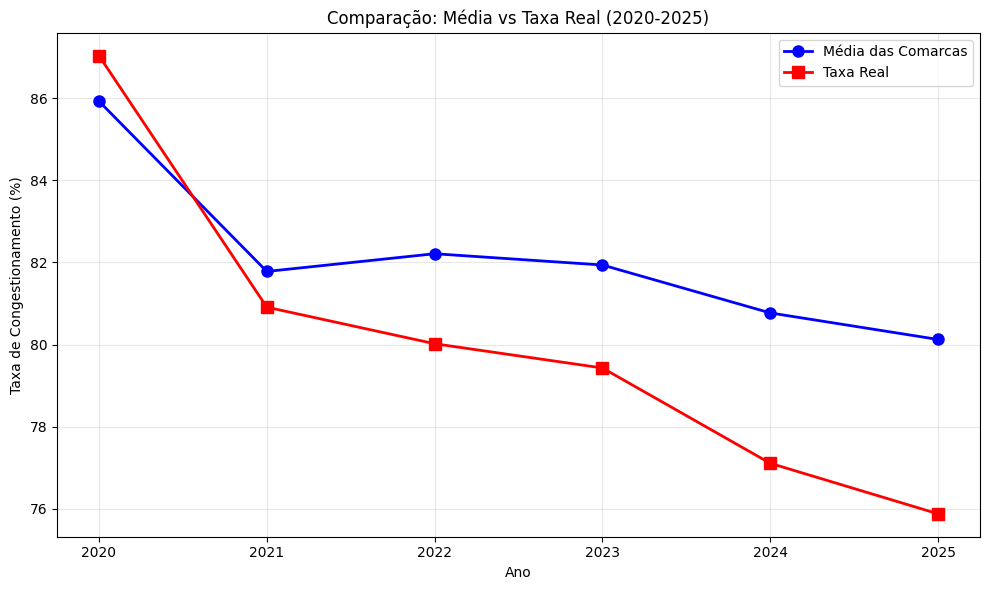


Tabela Comparativa:
Ano 2020: Média = 85.9% | Real = 87.0% | Diferença = 1.1pp
Ano 2021: Média = 81.8% | Real = 80.9% | Diferença = -0.9pp
Ano 2022: Média = 82.2% | Real = 80.0% | Diferença = -2.2pp
Ano 2023: Média = 81.9% | Real = 79.4% | Diferença = -2.5pp
Ano 2024: Média = 80.8% | Real = 77.1% | Diferença = -3.7pp
Ano 2025: Média = 80.1% | Real = 75.9% | Diferença = -4.2pp


In [22]:
import matplotlib.pyplot as plt

# Versão simplificada e segura
fig, ax = plt.subplots(figsize=(10, 6))  # Tamanho seguro

# Converter e filtrar
df_global_anual['ano_str'] = df_global_anual['ano_ref'].astype(str)
anos_interesse = [str(year) for year in range(2020, 2026)]
df_filtrado = df_global_anual[df_global_anual['ano_str'].isin(anos_interesse)]

if df_filtrado.empty:
    print("Sem dados para 2020-2025")
else:
    # Média anual
    taxa_media = df_filtrado.groupby('ano_str')['Taxa_Cong_global_anual (%)'].mean().reset_index()
    taxa_media = taxa_media.sort_values('ano_str')
    
    # Taxa agregada
    agregado = df_filtrado.groupby('ano_str').agg({
        'Distribuidos_ano': 'sum',
        'Baixados_ano': 'sum',
        'Pendentes_fim_ano': 'sum'
    }).reset_index().sort_values('ano_str')
    
    agregado['Taxa_Real (%)'] = (agregado['Pendentes_fim_ano'] / 
                                     (agregado['Pendentes_fim_ano'] + agregado['Baixados_ano']) * 100).round(2)
    
    # Plot simples
    ax.plot(taxa_media['ano_str'], taxa_media['Taxa_Cong_global_anual (%)'], 
            'b-o', label='Média das Comarcas', linewidth=2, markersize=8)
    ax.plot(agregado['ano_str'], agregado['Taxa_Real (%)'], 
            'r-s', label='Taxa Real', linewidth=2, markersize=8)
    
    # Configurações básicas
    ax.set_title('Comparação: Média vs Taxa Real (2020-2025)', fontsize=12)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Taxa de Congestionamento (%)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Tabela simples
    print("\nTabela Comparativa:")
    for i in range(len(taxa_media)):
        ano = taxa_media.iloc[i]['ano_str']
        media = taxa_media.iloc[i]['Taxa_Cong_global_anual (%)']
        agreg = agregado.iloc[i]['Taxa_Real (%)']
        print(f"Ano {ano}: Média = {media:.1f}% | Real = {agreg:.1f}% | Diferença = {agreg-media:.1f}pp")

# Gerador de Arquivos:

In [ ]:
# Correção: converter ano_ref para string “YYYY”
# Gerando o arquivo em json
# Cópia do df_global
df_out = df_global_anual.copy()

# Converte para datetime (quando possível) e formata como YYYY
df_out["ano_ref"] = pd.to_datetime(df_out["ano_ref"], errors="coerce").dt.strftime("%Y-%m")

# Se existirem valores que não converteram (NaT), transforma em string para não quebrar
mask_nat = df_out["ano_ref"].isna()
if mask_nat.any():
    df_out.loc[mask_nat, "ano_ref"] = df_global_anual.loc[mask_nat, "ano_ref"].astype(str)

os.makedirs("datasets", exist_ok=True)
df_out.to_json("datasets/tx_cong_anual_comarca_area_acao.json", orient="records", force_ascii=False)